# Bag of Words (BoW)

Bag of Words is a way to represent text data in machine learning. It converts text into numbers so models can understand it.
Key idea:

* Treat a document as a “bag” of its words, ignoring grammar and order.
* Count the occurrence of each word.
* Represent the document as a vector of word counts.

BoW is simple and widely used for text classification tasks like spam detection, sentiment analysis, and topic categorization.

### Key Concepts

- **Vocabulary:** The set of all unique words in the corpus.
- **Vector Representation:** Each document is represented as a vector with the length of the vocabulary.
- **Sparsity:** Most words don’t appear in every document, so vectors mostly contain zeros.

---

## Implementation Using Scikit-Learn for BoW

In [1]:
corpus = [
    "I love NLP",
    "NLP is fun",
    "I love learning NLP"
]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [6]:
print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Vectors:\n", X.toarray())

Vocabulary: ['fun' 'is' 'learning' 'love' 'nlp']
BoW Vectors:
 [[0 0 0 1 1]
 [1 1 0 0 1]
 [0 0 1 1 1]]


**Explanation:**

* `fit_transform` learns the vocabulary and transforms text into vectors.
* Each row corresponds to a document; each column corresponds to a word.
* The values are word counts.
* CountVectorizer automatically lowercases the text and tokenizes it into words (splits by whitespace and      punctuation).


### Handling Stop Words

Stop words are common words like "is", "the", "and". Removing them can make BoW more meaningful.


In [3]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
print("Vocabulary without stop words:", vectorizer.get_feature_names_out())
print("Vectors:\n", X.toarray())

Vocabulary without stop words: ['fun' 'learning' 'love' 'nlp']
Vectors:
 [[0 0 1 1]
 [1 0 0 1]
 [0 1 1 1]]


### Advantages of the Bag of Words Model

- **Simplicity:** Easy to implement and computationally efficient.  
- **Versatility:** Can be used for various NLP tasks such as text classification, sentiment analysis, and document clustering.  
- **Interpretability:** The resulting vectors are interpretable, making it easy to understand which words are most important in a document.  

### Limitations of Bag of Words

- **Loss of Context:** Ignores word order and context, so it might miss important relationships between words.  
- **Sparsity:** In large datasets, most word vectors are sparse (contain mostly zeros), which can lead to inefficiency.  
- **Limited Semantic Understanding:** The model doesn’t capture the meaning of words, which can be important for some NLP tasks.


### Example: Full BoW Pipeline

Before applying Bag of Words, the text should be **cleaned and preprocessed** to ensure meaningful vectors. Here’s what you should do:

### Text Cleaning / Preprocessing Steps

* **Lowercasing:** Convert all text to lowercase to avoid treating "NLP" and "nlp" differently.
* **Remove Punctuation:** Punctuation marks are usually not useful for BoW.
* **Remove Numbers (optional):** Depends on your task; sometimes numbers are not meaningful.
* **Remove Stop Words:** Words like "is", "the", "and" don’t add much meaning.
* **Tokenization:** Split sentences into words.
* **Lemmatization/Stemming (optional):** Reduce words to their root forms (e.g., "learning" → "learn").

In [15]:
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample corpus

corpus = [
    "The new superhero movie was fantastic and thrilling!",
    "I didn’t enjoy the horror film; it was too scary.",
    "The comedy show made me laugh nonstop.",
    "The acting in the drama was mediocre, but the soundtrack was beautiful.",
    "I loved the animation and visual effects in the movie.",
    "The plot was boring and predictable.",
    "Amazing cinematography and brilliant performances!",
    "The movie was too long and dragged in the middle scenes.",
    "Heartwarming story with excellent direction.",
    "I regret watching the film; it was disappointing."
]


# Cleaning + Lemmatization function with spaCy stop words removal
def clean_text_spacy(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

clean_corpus = [clean_text_spacy(sentence) for sentence in corpus]

# Bag of Words vectorization with CountVectorizer stop word removal disabled (already done)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_corpus)

print("Cleaned + Lemmatized Corpus:", clean_corpus)
print("\nVocabulary:", vectorizer.get_feature_names_out())
print("\nBoW Vectors:\n", X.toarray())


Cleaned + Lemmatized Corpus: ['new superhero movie fantastic thrilling', 'not enjoy horror film scary', 'comedy laugh nonstop', 'acting drama mediocre soundtrack beautiful', 'love animation visual effect movie', 'plot boring predictable', 'amazing cinematography brilliant performance', 'movie long drag middle scene', 'heartwarming story excellent direction', 'regret watch film disappointing']

Vocabulary: ['acting' 'amazing' 'animation' 'beautiful' 'boring' 'brilliant'
 'cinematography' 'comedy' 'direction' 'disappointing' 'drag' 'drama'
 'effect' 'enjoy' 'excellent' 'fantastic' 'film' 'heartwarming' 'horror'
 'laugh' 'long' 'love' 'mediocre' 'middle' 'movie' 'new' 'nonstop' 'not'
 'performance' 'plot' 'predictable' 'regret' 'scary' 'scene' 'soundtrack'
 'story' 'superhero' 'thrilling' 'visual' 'watch']

BoW Vectors:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
  0 0 0 0]


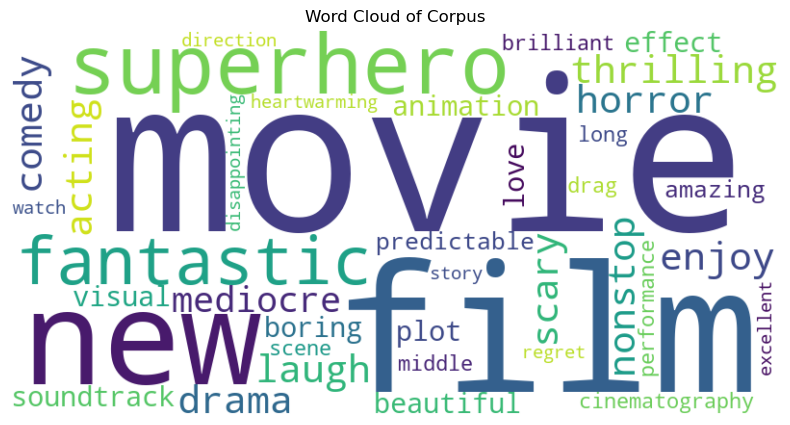

In [16]:
# Install wordcloud if not already installed
# !pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into one string
all_text = ' '.join(clean_corpus)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Corpus")
plt.show()
